# Working with Dimension Reduction Methods

*A live document to complement the lectures in Week-04*

Let's work with the very simple but highly popular Iris Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

column_names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]

## Exploratory analysis

Let's do a bit of exploratory analysis to check the characteristics of the features and look for redundancies

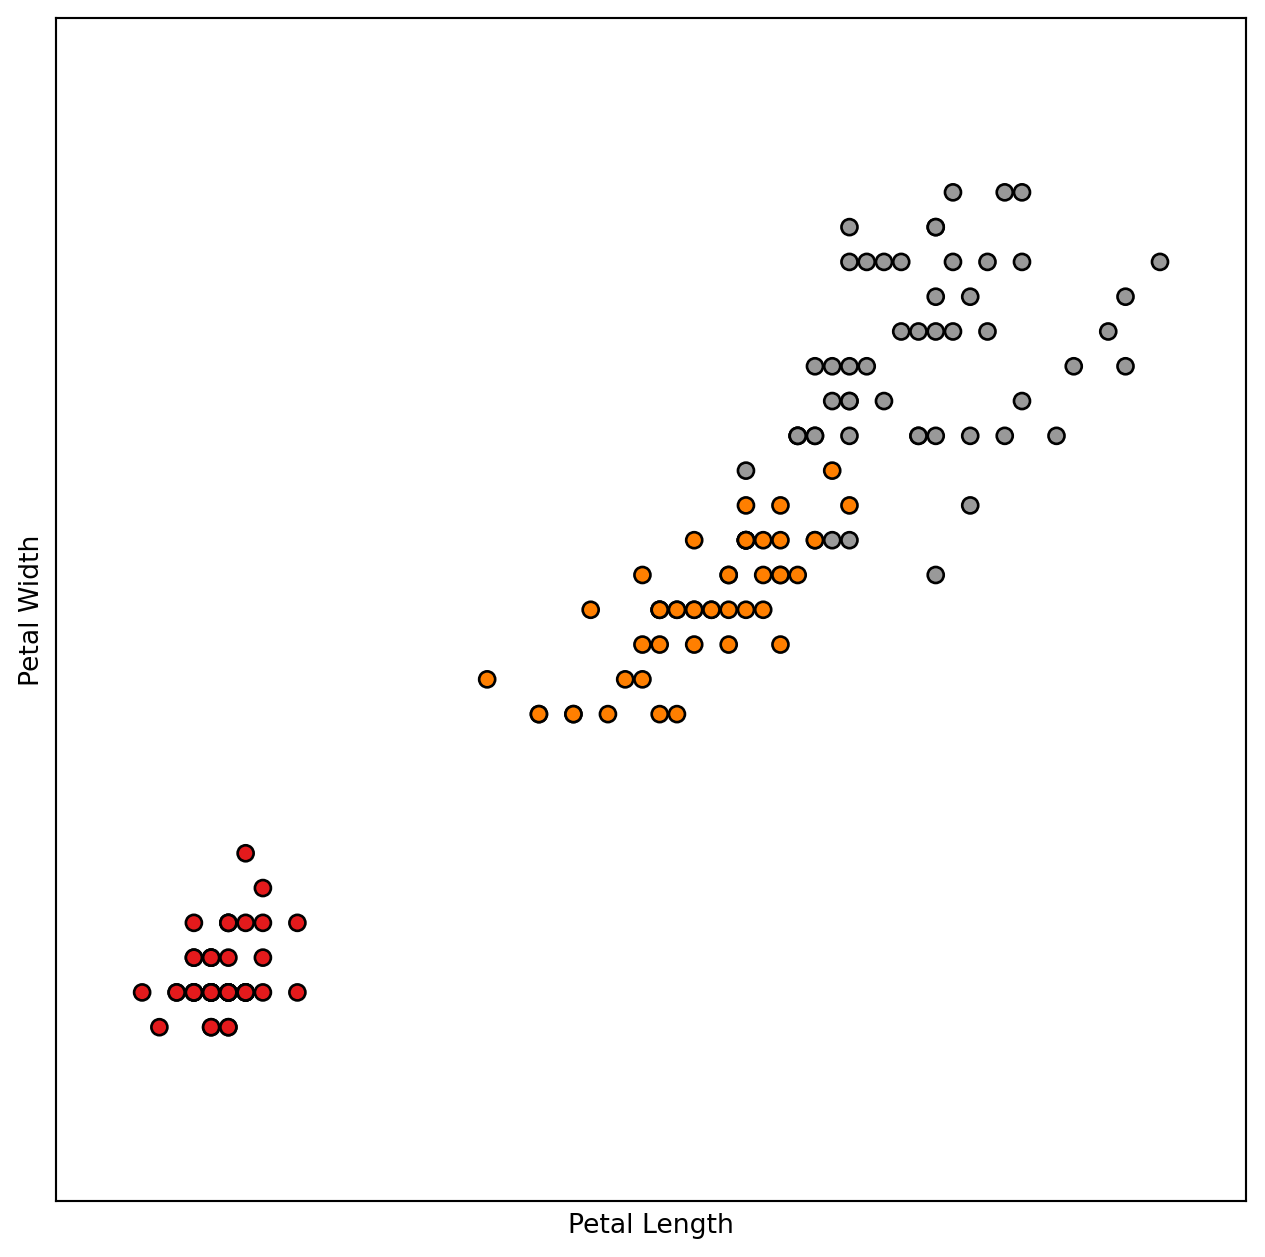

In [2]:
# Plot the training points

columnIndexToUseX = 2
columnIndexToUseY = 3

x_min, x_max = X[:, columnIndexToUseX].min() - .5, X[:, columnIndexToUseX].max() + .5
y_min, y_max = X[:, columnIndexToUseY].min() - .5, X[:, columnIndexToUseY].max() + .5

plt.figure(figsize=(8, 8))
plt.scatter(X[:, columnIndexToUseX], X[:, columnIndexToUseY], c=y, cmap=plt.cm.Set1,
            edgecolor='k' )
plt.xlabel(column_names[columnIndexToUseX])
plt.ylabel(column_names[columnIndexToUseY])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()



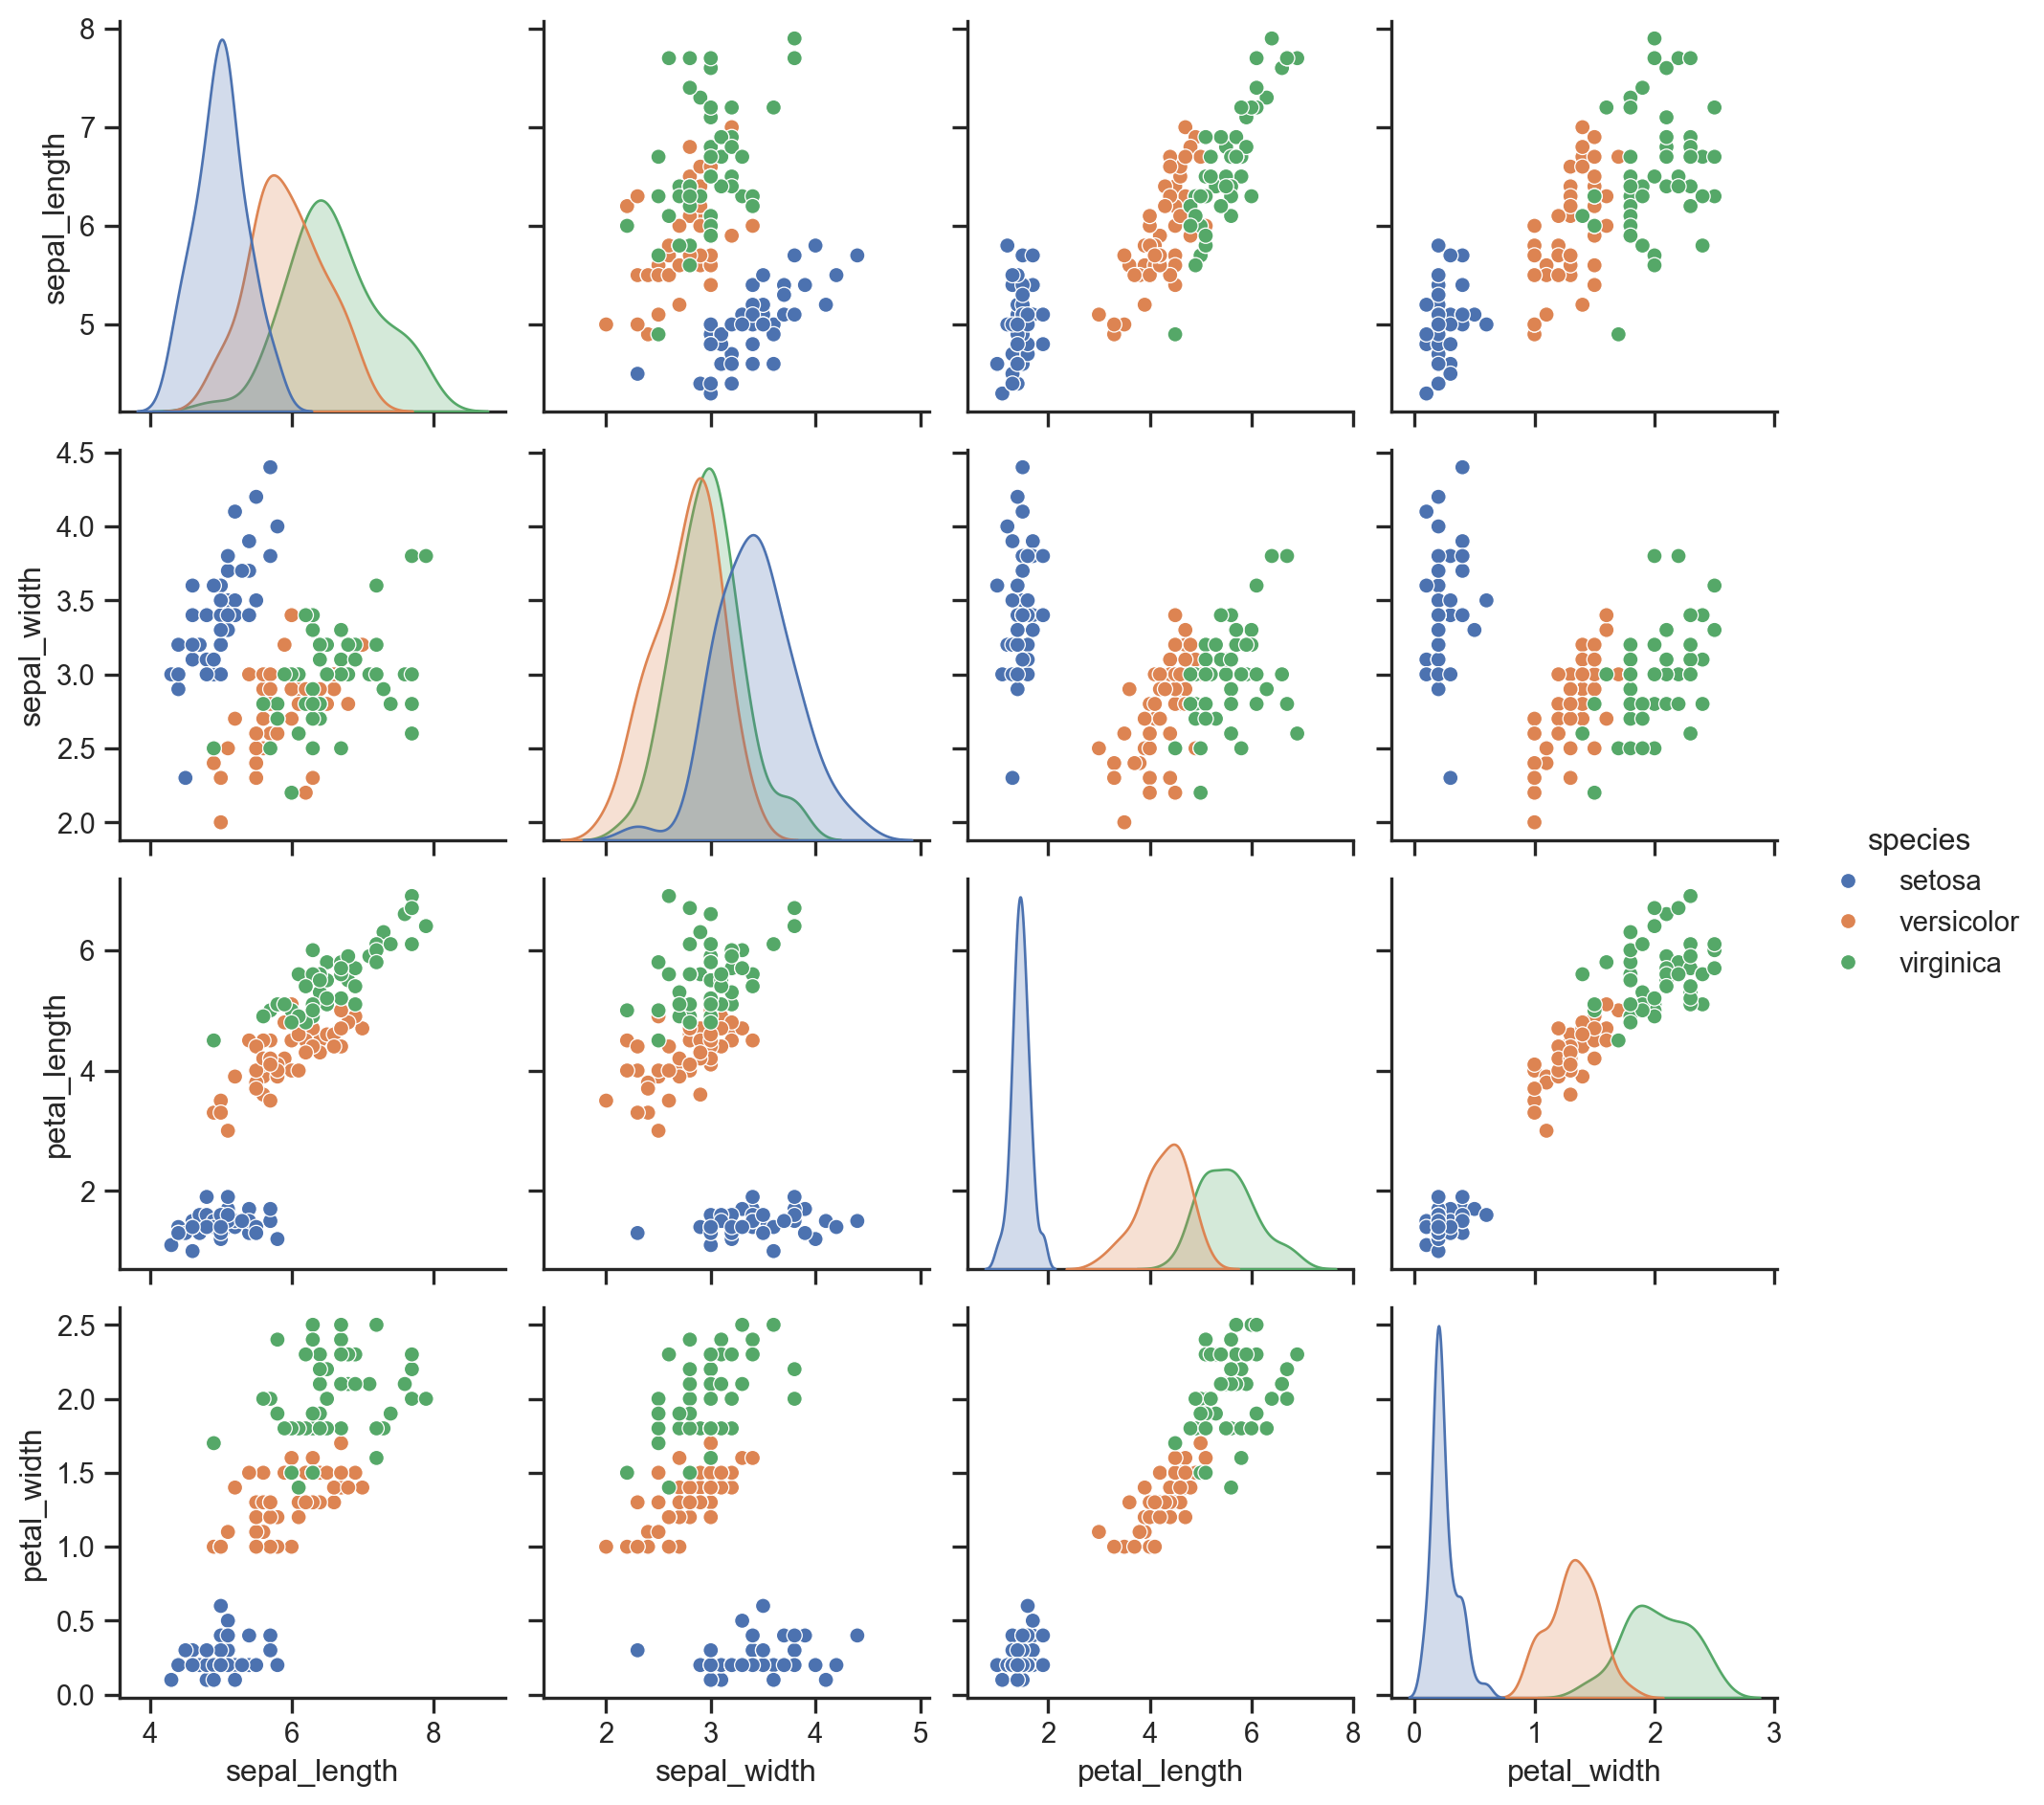

In [3]:
#| column: page

# It would be good to have a look at the pairwise correlations. 
# This might help one to identify some redundant variables at least as long as pairs of dimensions are considered.
import seaborn as sns
sns.set(style="ticks")

## we are cheating here and using a copy of the Iris data as made available as a Pandas DataFrame within the Seaborn package
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

## Principal Component Analysis 

Here we start working with PCA to find linear mappings of the original dimension space

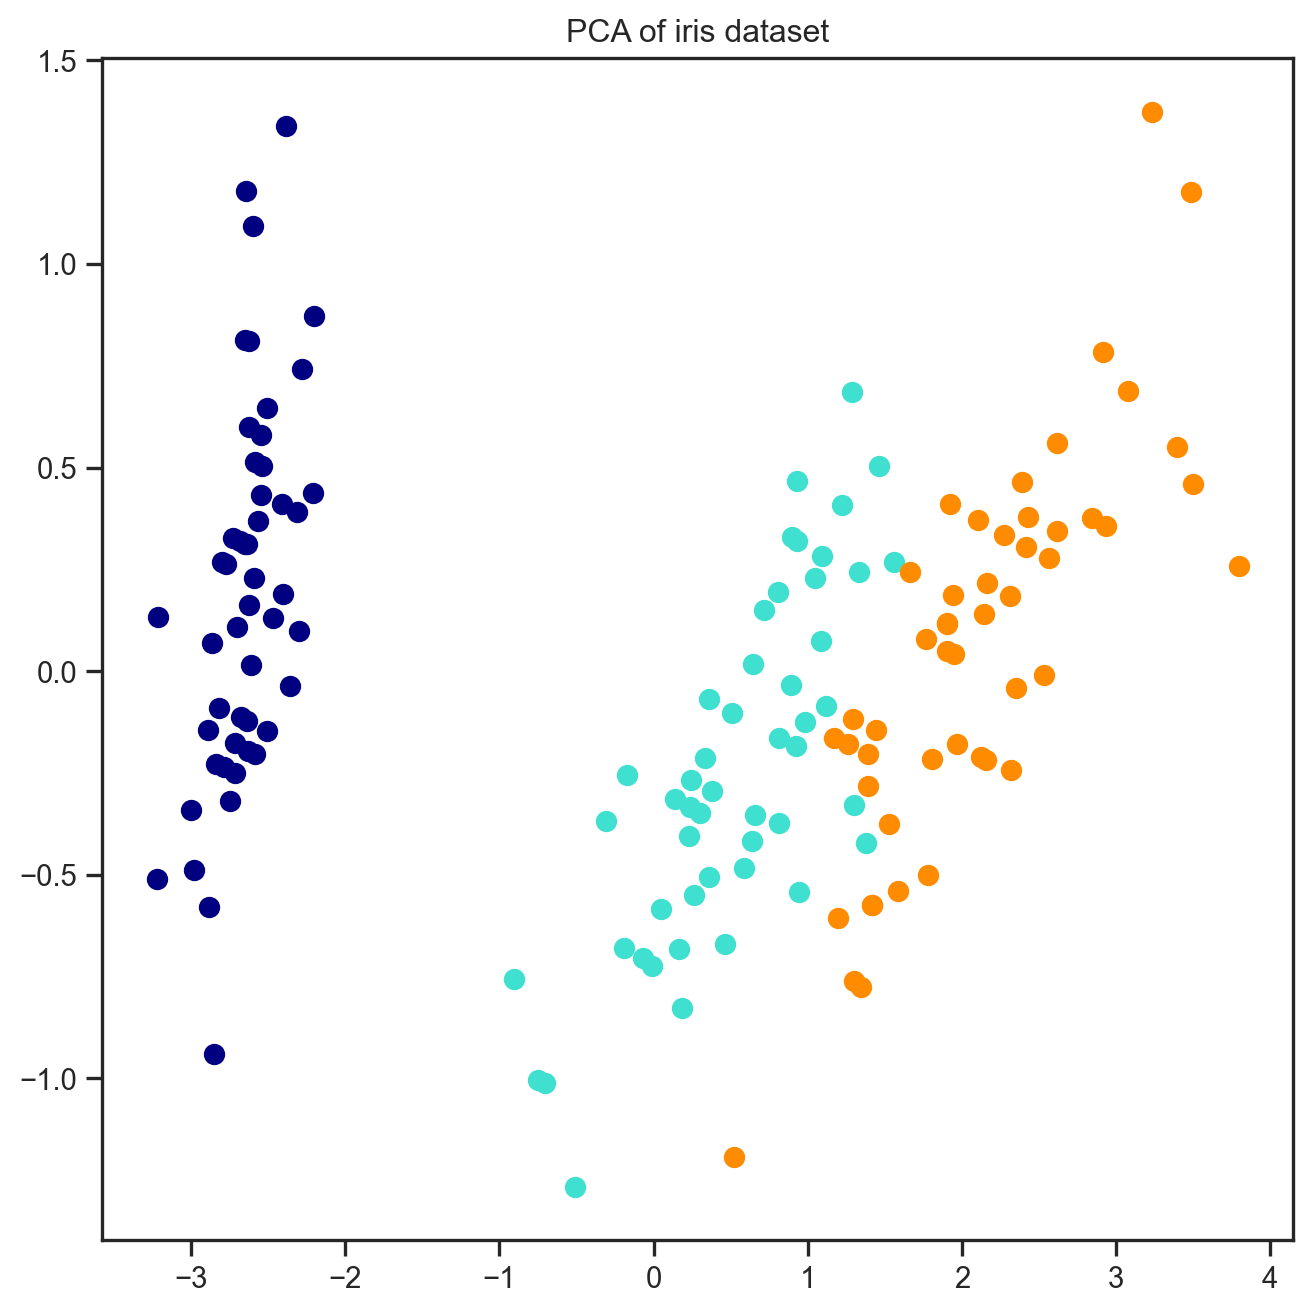

In [4]:
from sklearn.decomposition import PCA


# I am stating how many components I would like my final projection space to have
n_components = 2

# This line creates a PCA computation object
pca = PCA(n_components=n_components)

# And this line "projects the data to the newly generated space"
X_pca = pca.fit_transform(X)

# I set the colours that I can use to colour the different classes of iris flowers with. I may not always have this class information but in this instance, we have this information so we can use it for colouring.
colors = ['navy', 'turquoise', 'darkorange']

plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                color=color, lw=2, label=target_name)

plt.title("PCA of iris dataset")


plt.show()

In [5]:
print(column_names)
pca.components_

['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']


array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])


### A bit on interpretation

OK, what are we looking at here ...

The array of numbers we are looking at above are actually the coefficients of the first two principal components, so these "are" the components.

The first line consists of the "loadings" of the variables for the first component, this means: 

**Sepal Length**'s loading in principal component 1 (PC1) is 0.36138659, **Sepal Width**'s is -0.08452251, **Petal Length**'s is 0.85667061 and **Petal Width**'s is 0.3582892. And the second line of numbers correspond to the loadings of the variables within the "second" principal component.

But then, what do these numbers tell us? One analysis we can do here is to look at the "magnitude" of these numbers. If you look at the four numbers, we notice that the largest in magnitude is for **Petal Length** (0.85667061) which indicates that the most **important** dimension for this component is **Petal Length**. As far as PCA is concerned, the notion of importance is how much of the "variance" of the data is explained by a principal component, so Petal Length is the feature that has the most influence on the variation within the data along the first component. And the first component is the computed axis that explains most of the variance in the data (i.e., has the highest eigenvalue in the computations -- see the slides). We can do a similar analysis for the second component, and notice that **Sepal Widht** is the most key variable in this component but I **Sepal Length** is also important as seen from its higher loading value.

If we look at these four variables, the only variable that didn't get a high loading is **Petal Width**, this is a sign that this feature might not carry similar levels of variation as the others.

#### How about the "projection"?

What we look at above in the scatterplot, what we are seeing is all the observations "projected" onto this new space defined by the two principal components. This is why dimension reduction methods are often referred to as "projection" or "embedding" methods. The idea is that the new components give you a new "space" where you can observe your data points. This is what the `X_pca = pca.fit_transform(X)` line is doing in the code above.


## LDA
Linear Discriminant Analysis is a method which considers the class labels as well as the data during the projection

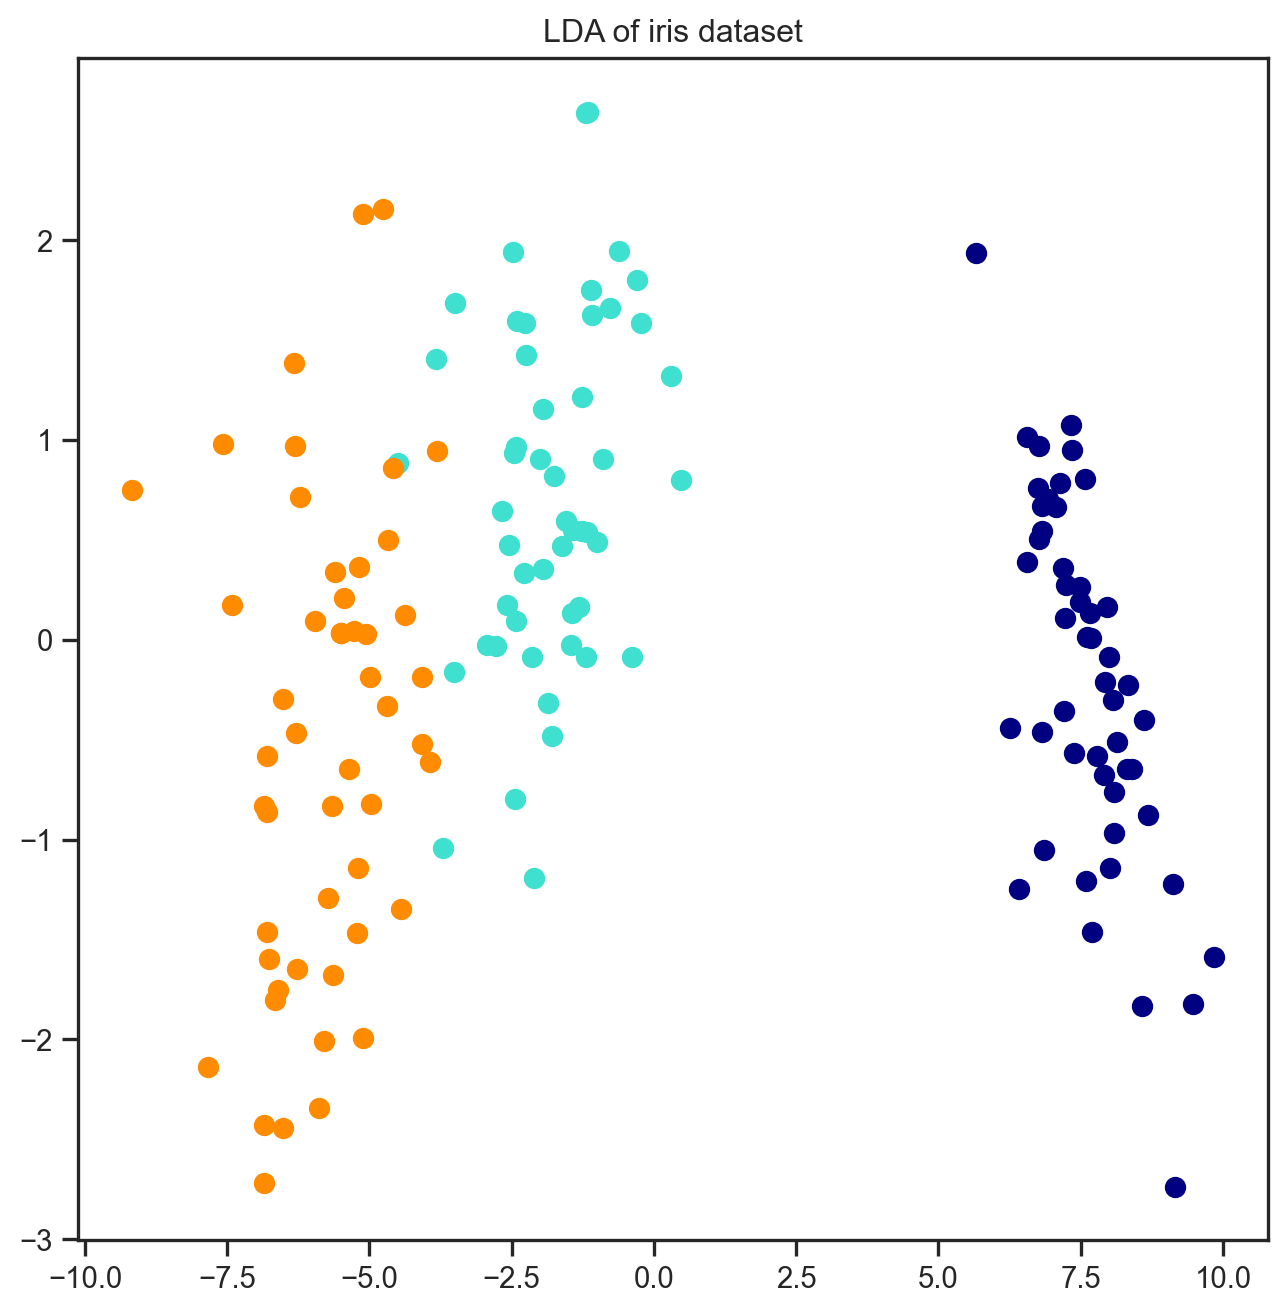

In [6]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)
# Notice here that we are also feeding in the class labels
# Since we have three classes but LDA is a binary method, 
# it will automatically run 1 vs. 2 other classes for all the combinations

plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1],
                color=color, lw=2, label=target_name)

plt.title("LDA of iris dataset")


plt.show()


In [7]:
print(column_names)
lda.coef_

['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']


array([[  6.31475846,  12.13931718, -16.94642465, -20.77005459],
       [ -1.53119919,  -4.37604348,   4.69566531,   3.06258539],
       [ -4.78355927,  -7.7632737 ,  12.25075935,  17.7074692 ]])

## A regularised method -- SparcePCA

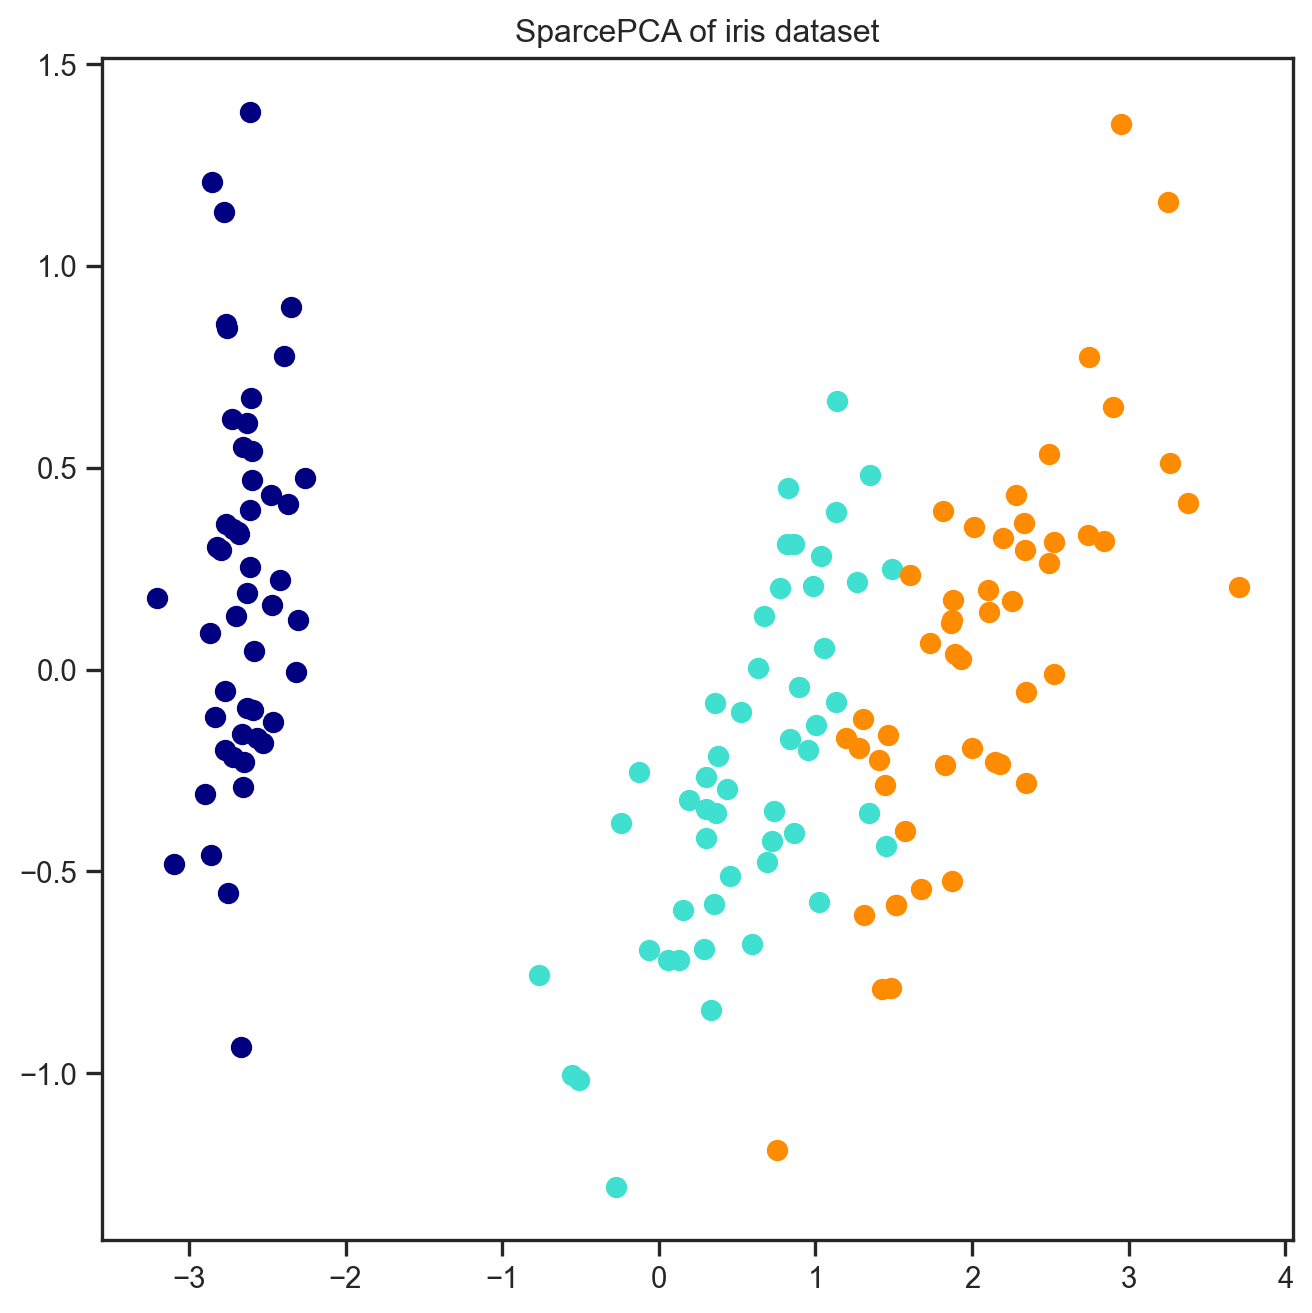

In [8]:
# A regularised version of PCA -- SparsePCA -- this is one of those Embedded methods that we talked about
from sklearn.decomposition import SparsePCA

s_pca = SparsePCA(n_components=n_components)
Sparse_PCA_embdedded = s_pca.fit_transform(X)

colors = ['navy', 'turquoise', 'darkorange']

plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(Sparse_PCA_embdedded[y == i, 0], Sparse_PCA_embdedded[y == i, 1],
                color=color, lw=2, label=target_name)

plt.title("SparcePCA of iris dataset")
plt.show()

In [9]:
# Let's see if we observe differences
print(column_names)
s_pca.components_

['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']


array([[ 0.34155543, -0.04951592,  0.87443905,  0.34094634],
       [ 0.68542067,  0.72814731,  0.        ,  0.        ]])

## A non-linear method called tSNE

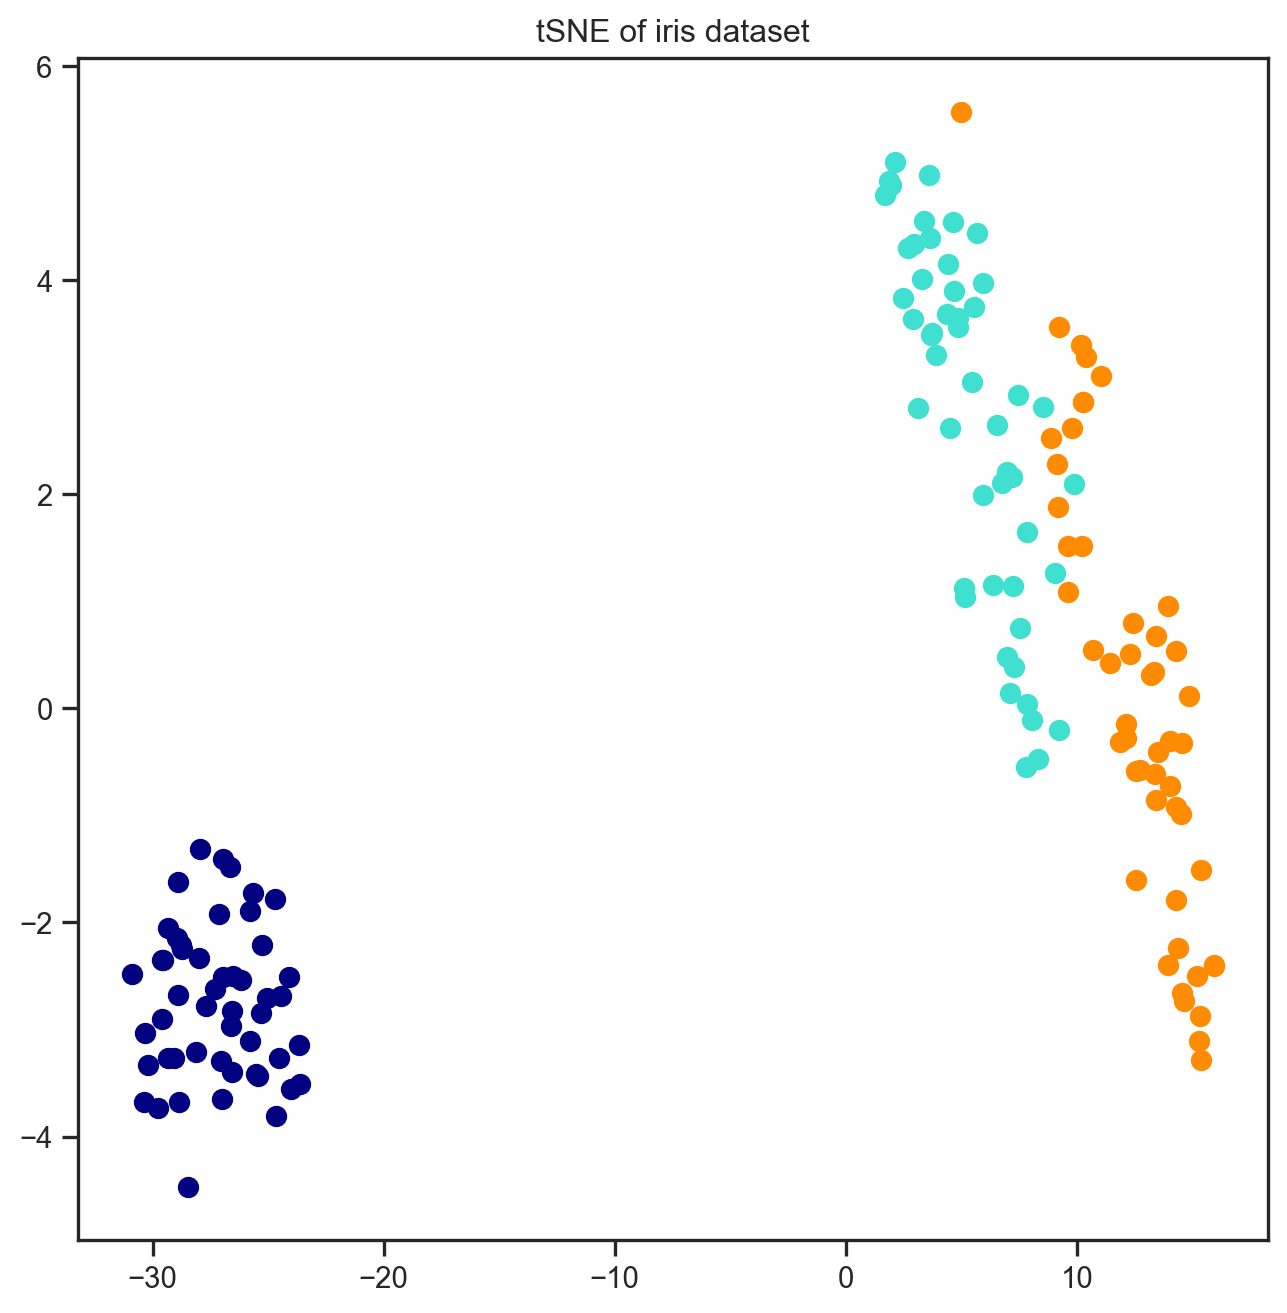

In [10]:
from sklearn.manifold import TSNE

TSNE_Model = TSNE(n_components=n_components)
tSNE_embdedded = TSNE_Model.fit_transform(X)

plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(tSNE_embdedded[y == i, 0], tSNE_embdedded[y == i, 1],
                color=color, lw=2, label=target_name)

plt.title("tSNE of iris dataset")

plt.show()

### How is tSNE results different?
Notice how different the results came up with tSNE. The clusters are much more visible and better seperated. However, the spread within the clusters are mostly gone. And now the axes are not a linear combination of the original features any more.